<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-the-PHM2017-dataset" data-toc-modified-id="Load-the-PHM2017-dataset-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load the PHM2017 dataset</a></span></li><li><span><a href="#Experiment-Settting-Explanation" data-toc-modified-id="Experiment-Settting-Explanation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Experiment Settting Explanation</a></span></li><li><span><a href="#Train-baseline-model-of-stroke-dataset" data-toc-modified-id="Train-baseline-model-of-stroke-dataset-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Train baseline model of stroke dataset</a></span><ul class="toc-item"><li><span><a href="#split-dataset-by-symptom" data-toc-modified-id="split-dataset-by-symptom-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>split dataset by symptom</a></span></li><li><span><a href="#tf-idf-and-LR" data-toc-modified-id="tf-idf-and-LR-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>tf-idf and LR</a></span></li><li><span><a href="#word-embedding-and-LR" data-toc-modified-id="word-embedding-and-LR-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>word embedding and LR</a></span></li><li><span><a href="#word-embedding-and-MLP" data-toc-modified-id="word-embedding-and-MLP-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>word embedding and MLP</a></span></li><li><span><a href="#LSTM" data-toc-modified-id="LSTM-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>LSTM</a></span></li><li><span><a href="#overall-baseline" data-toc-modified-id="overall-baseline-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>overall baseline</a></span></li></ul></li><li><span><a href="#Add-additional-features" data-toc-modified-id="Add-additional-features-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Add additional features</a></span><ul class="toc-item"><li><span><a href="#keyword-extraction-and-conceptualization" data-toc-modified-id="keyword-extraction-and-conceptualization-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>keyword extraction and conceptualization</a></span></li></ul></li><li><span><a href="#Some-thoughts:" data-toc-modified-id="Some-thoughts:-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Some thoughts:</a></span></li><li><span><a href="#Baseline-results-for-all-classes" data-toc-modified-id="Baseline-results-for-all-classes-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Baseline results for all classes</a></span><ul class="toc-item"><li><span><a href="#split-all-datasets" data-toc-modified-id="split-all-datasets-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>split all datasets</a></span></li></ul></li></ul></div>

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.max_columns = None #show all cols
pd.options.display.max_colwidth = -1 #show complete value in each cells

# Load the PHM2017 dataset

In [40]:
df=pd.read_csv('../clean_data/PHM2017/PHM2017.csv')

In [44]:
print(df.shape)
df.head()
df.loc[df['label']==3]

(5288, 4)


,id,tweet,symptom,label
12,811645757732352004,"my left arm is numb I'm about to have a heart attack and die this is it boys, sci till I die",heart attack,3
19,811646344314101760,I think I'm having a heart attack \r\r\nMy chest hurts,heart attack,3
28,811647202258984961,Cause lord knows I was boutta have a heart attack,heart attack,3
67,811652281062068224,2 years ago I survived a heart attack through God's provision and Dr. Zidar's awesome skills. My annual visit is a spiritual experience!,heart attack,3
69,811652415875416068,i'm gonna have a heart attack at like 25,heart attack,3
93,811656615002783744,"I love Five Guys too, they'll probably give me a heart attack one day",heart attack,3
112,811658251200774144,JESuS fucking cHRIST I did not need a heart attack today I really didn't.,heart attack,3
131,811660394947313664,"- would have just passed out from a heart attack or something of the sort. \r\r\n\r\r\n""He could have at least told me..."" He mumbled, -",heart attack,3
140,811661175989604356,"Ahah! I searched my tweets, couldn't find it!!! Alzheimer's is a dreadful thing! I SAID ALZHEIMERS IS A DREADFUL THING!",alzheimer,3
198,811664602433921024,I JUST HAD A HEART ATTACK OVER NOTHING,heart attack,3


In [35]:
print(df.groupby(['symptom']).count()['id'])
print('\nalzheimer\n',df.groupby(['symptom','label']).count().loc['alzheimer']['id'].apply(lambda x:x/1045).values)
print('\ncancer\n',df.groupby(['symptom','label']).count().loc['cancer']['id'].apply(lambda x:x/911).values)
print('\ndepression\n',df.groupby(['symptom','label']).count().loc['depression']['id'].apply(lambda x:x/836).values)
print('\nheart attack\n',df.groupby(['symptom','label']).count().loc['heart attack']['id'].apply(lambda x:x/813).values)
print('\nparkinson\n',df.groupby(['symptom','label']).count().loc['parkinson']['id'].apply(lambda x:x/793).values)
print('\nstroke\n',df.groupby(['symptom','label']).count().loc['stroke']['id'].apply(lambda x:x/890).values)

symptom
alzheimer       1045
cancer           911
depression       836
heart attack     813
parkinson        793
stroke           890
Name: id, dtype: int64

alzheimer
 [0.01722488 0.815311   0.16076555 0.00669856]

cancer
 [0.13501647 0.66081229 0.17453348 0.02963776]

depression
 [0.1208134  0.49521531 0.03349282 0.35047847]

heart attack
 [0.67527675 0.18819188 0.09717097 0.03936039]

parkinson
 [0.23076923 0.66834805 0.08322825 0.01765448]

stroke
 [0.55168539 0.29775281 0.1247191  0.0258427 ]


Compared to original dataset each are less about 200-300 samples per symptom .

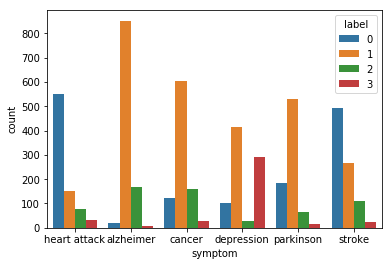

In [6]:
sns.countplot(x="symptom", hue="label", data=df).figure.savefig("output.png")

Label Explanation:  
0: non-health  
1: awareness  
2: other-mention  
3: self-mention.  

In each category of symptom, they suffer from a huge data imbanlanced problem.

# Experiment Settting Explanation

- In the original experiments, *self-mention* and *other-mention* labels are taken as **positive class**; and *awareness* and *non-health* labels are taken as **negative class**.  

- Due to the data imbanlance problem. They report the result using Precision,Recall,F1 score of the **minority class(positive class)** to give the evaluation.

- Standard 10 fold Cross-Validation within each topic of PHM2017 dataset. The results reported are the averages over the test folds.

# Train baseline model of stroke dataset

## split dataset by symptom

we take the stroke dataset to do the experiment.

In [18]:
df[df['symptom']=='alzheimer'].shape
df[df['symptom']=='cancer'].shape
df[df['symptom']=='depression'].shape
df[df['symptom']=='heart attack'].shape
df[df['symptom']=='parkinson'].shape
df[df['symptom']=='stroke'].shape


(890, 4)

In [19]:
df_stroke=df[df['symptom']=='stroke'][['tweet','label']]

In [20]:
df_stroke[df_stroke.tweet.duplicated()]

,tweet,label
2459,Bad news... I need prayers or good thoughts. W...,2
2465,Alex would move his left hand to gently stroke...,0
2501,Q: Have you heard that George Michael was foun...,2
2755,That's a good girl. Stroke it baby. -Smirks an...,0
3589,At the third stroke the time in the UK will be...,0
3590,"""Remember that sometimes not getting what you ...",0
3795,This Updated Pegboard Game Helps Stroke Victim...,1
4649,"Having at least one ""lazy day"" per week can re...",1


##  tf-idf and LR

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

text_clf = Pipeline([
     ('vect', CountVectorizer()),
     ('tfidf', TfidfTransformer()),
     ('clf', LogisticRegression(random_state=0,max_iter=500,solver='lbfgs',
                            multi_class='multinomial')),
])

text_clf.fit(df_stroke.tweet.values, df_stroke.label)  

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip..., penalty='l2', random_state=0, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False))])

In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
predicted = text_clf.predict(df_stroke.tweet.values)
scoring = ['precision_macro', 'recall_macro','f1_macro']
scores = cross_validate(text_clf, df_stroke.tweet.values, df_stroke.label, 
                         scoring=scoring,
                         cv=5)
scores

D:\softwares\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\softwares\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\softwares\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\softwares\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\softwares\Anaconda3\lib\site-packages\sklearn\metrics\classif

{'fit_time': array([0.10073256, 0.10272551, 0.11170197, 0.1067152 , 1.54386878]),
 'score_time': array([0.02792358, 0.01795268, 0.01695371, 0.01695466, 0.02692723]),
 'test_precision_macro': array([0.59166667, 0.49883376, 0.58772265, 0.59251208, 0.59620536]),
 'train_precision_macro': array([0.70043087, 0.70166171, 0.70011404, 0.7021234 , 0.70335369]),
 'test_recall_macro': array([0.41941358, 0.41625389, 0.4503448 , 0.46155967, 0.42459394]),
 'train_recall_macro': array([0.6136473 , 0.61042479, 0.61042479, 0.61821603, 0.61885175]),
 'test_f1_macro': array([0.44036427, 0.40464494, 0.46352478, 0.47416877, 0.44424214]),
 'train_f1_macro': array([0.64028094, 0.63770495, 0.63709903, 0.64504073, 0.64540262])}

In [23]:
print('tfidf+LR average f1 on test set:',np.mean(np.array([0.44036427, 0.40464494, 0.46352478, 0.47416877, 0.44424214])))

tfidf+LR average f1 on test set: 0.44538898


In [24]:
from sklearn import metrics
print(predicted.shape)
print(metrics.classification_report(df[df['symptom']=='stroke'].label, predicted))
#      target_names=df.label.unique()))

(890,)
              precision    recall  f1-score   support

           0       0.85      1.00      0.91       491
           1       0.97      0.89      0.93       265
           2       1.00      0.62      0.77       111
           3       0.00      0.00      0.00        23

   micro avg       0.89      0.89      0.89       890
   macro avg       0.70      0.63      0.65       890
weighted avg       0.88      0.89      0.88       890



D:\softwares\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\softwares\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\softwares\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## word embedding and LR

glove embedding and average as sentence embedding

In [25]:
EMBEDDING_DIM=300
# glove embedding 
# use average as sentence embedding

In [26]:
from nltk.tokenize import TweetTokenizer

df_stroke
tk = TweetTokenizer()

def loadGloveModel(gloveFile):
    print("Loading Glove Model")
    f = open(gloveFile,'r',encoding='utf-8')
    model = {}
    for line in f:
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print("Done.",len(model)," words loaded!")
    return model

embedding_dic=loadGloveModel('D:/Datasets/glove.6B.300d.txt')

Loading Glove Model
Done. 400000  words loaded!


In [27]:
dataset=[]
for t in df_stroke.tweet.tolist():
    dataset.append(tk.tokenize(t))

In [28]:
np.nonzero(dataset[1])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22], dtype=int64),)

In [29]:

data_emb=np.zeros((len(dataset),EMBEDDING_DIM))
for i in range(len(dataset)):
    each_emb=np.zeros((len(dataset[i]),EMBEDDING_DIM))
    for j,w in enumerate(dataset[i]):
        if(w in embedding_dic):
            each_emb[j]=embedding_dic[w]
#             break
    data_emb[i]=np.mean(each_emb, axis=0)        
        
#     nonzero_inds=np.nonzero(dataset[i].flatten())
#     review_emb=embedding_matrix[nonzero_inds]
#     data_emb[i]=np.mean(review_emb, axis=0)


In [30]:
from sklearn.metrics import classification_report, accuracy_score, make_scorer

def classification_report_with_accuracy_score(y_true, y_pred):

    print(classification_report(y_true, y_pred)) # print classification report
    return accuracy_score(y_true, y_pred) # return accuracy score



In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0, solver='lbfgs',
                          multi_class='multinomial')

scoring = ['precision_macro', 'recall_macro','f1_macro']
scores = cross_validate(clf, data_emb, df_stroke.label, 
#                         print evaluation metric for each class
#                          scoring=make_scorer(classification_report_with_accuracy_score),
                         scoring=scoring,
                         cv=5)
scores

D:\softwares\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\softwares\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\softwares\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\softwares\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\softwares\Anaconda3\lib\site-packages\sklearn\metrics\classif

{'fit_time': array([0.06033444, 0.05684853, 0.05086398, 0.05186009, 0.05788112]),
 'score_time': array([0.00199437, 0.00199628, 0.00199437, 0.00199556, 0.00299454]),
 'test_precision_macro': array([0.55944684, 0.55011261, 0.63769871, 0.53176218, 0.57835334]),
 'train_precision_macro': array([0.89831149, 0.88164612, 0.89003318, 0.89320655, 0.87574066]),
 'test_recall_macro': array([0.51775134, 0.5195374 , 0.5440412 , 0.48304425, 0.57511289]),
 'train_recall_macro': array([0.6070613 , 0.62480363, 0.60968706, 0.63669937, 0.60015559]),
 'test_f1_macro': array([0.53176464, 0.52898339, 0.57127736, 0.49753122, 0.5752635 ]),
 'train_f1_macro': array([0.63939964, 0.66057232, 0.65266098, 0.68268774, 0.6399105 ])}

In [32]:
print('GloVe+LR average f1 on test set:',np.mean(np.array([0.53176464, 0.52898339, 0.57127736, 0.49753122, 0.5752635 ])))

GloVe+LR average f1 on test set: 0.540964022


## word embedding and MLP

In [33]:
from sklearn.neural_network import MLPClassifier

hidden_neurons=256
    
classifier = MLPClassifier(hidden_layer_sizes=(hidden_neurons,hidden_neurons), max_iter=1000, alpha=0.001,
                     solver='adam', verbose=0,  random_state=0)

print("start training..")
# classifier.fit(X_train_emb,y_train)
scoring = ['precision_macro', 'recall_macro','f1_macro']
scores = cross_validate(classifier, data_emb, df_stroke.label, 
#                         print evaluation metric for each class
#                          scoring=make_scorer(classification_report_with_accuracy_score),
                         scoring=scoring,
                         cv=5)
scores

start training..


D:\softwares\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\softwares\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\softwares\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('train_precision_macro'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\softwares\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('train_recall_macro'), which will not be available by default any more in 0.21. If you nee

{'fit_time': array([3.56659627, 2.77657127, 3.20047545, 2.71680737, 3.25139666]),
 'score_time': array([0.00598216, 0.00498772, 0.00498581, 0.00598335, 0.00598288]),
 'test_precision_macro': array([0.67597188, 0.51856777, 0.57239541, 0.53682627, 0.64107251]),
 'train_precision_macro': array([0.99810127, 0.99873418, 0.99810606, 0.99936548, 0.99810606]),
 'test_recall_macro': array([0.68778722, 0.5050014 , 0.57101726, 0.55517293, 0.69409196]),
 'train_recall_macro': array([0.9948006 , 0.99764151, 0.99483252, 0.99719101, 0.99483252]),
 'test_f1_macro': array([0.67632275, 0.5103583 , 0.57038027, 0.54460784, 0.66288015]),
 'train_f1_macro': array([0.99643361, 0.99818065, 0.99645217, 0.99826991, 0.99645217])}

In [34]:
print('GloVe+MLP average f1 on test set:',(0.67632275+0.5103583+0.57038027+0.54460784+0.66288015)/5)

GloVe+MLP average f1 on test set: 0.592909862


## LSTM

In [12]:
# Keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Flatten, LSTM, Conv1D, MaxPooling1D, Dropout, Activation
from keras.layers.embeddings import Embedding

# Others
import nltk
import string
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from sklearn.manifold import TSNE

#load glove into embeddings_index
embeddings_index = dict()
f = open('D:/Datasets/glove.6B.300d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

embeddings_index=embedding_dic


## overall baseline

| Word Vector | ML Model   |Average F1
|------|------|------|
| tf-idf | LR   | 0.44538898 |
|   GloVe  | LR| 0.540964022|
|   GloVe  | MLP| 0.592909862|

# Add additional features

## keyword extraction and conceptualization

- use **tf-idf weight** extract the keywords of each tweet
- and enhanced by **conceptulization knowledge** of the keywords embedding

In [164]:
import urllib.request
import urllib.parse
# edit the number_of_concepts to get top_k concepts
number_of_concepts=1

def get_concepts(keyword):
#     keyword='string'
    keyword=keyword.replace(' ','%20')
    url = 'https://concept.research.microsoft.com/api/Concept/ScoreByProb?instance='+keyword+'&topK=10'
    try:
        f = urllib.request.urlopen(url)
        concept_dic=eval(f.read().decode('utf-8'))
        top_concept=list(concept_dic.keys())
#         print(list(concept_dic.keys())[:number_of_concepts])
        return top_concept[:number_of_concepts]
    except:
        print('error')
        return []

get_concepts('microsoft')

['company']

In [166]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english')
# pay attention the tfidf vector it's only for df_stroke
X = vectorizer.fit_transform(df_stroke.tweet.tolist())
# print(vectorizer.get_feature_names()[2042])

df = pd.DataFrame(X.toarray(), columns = vectorizer.get_feature_names())

# edit the max_weight_word_num to set the number of words for extracting concepts
max_weight_word_num=1
df_concepts={}

# look at the top words
for index, rows in df.iterrows(): 
    doc_emb=rows.values
    max_tfidf_inds=np.array(doc_emb.argsort()[-3:][::-1])
#     print(doc_emb[max_tfidf_inds])
    df_concepts[index]=[]
    for n,ind in enumerate(max_tfidf_inds):
#         print(vectorizer.get_feature_names()[ind])
        con=get_concepts(vectorizer.get_feature_names()[ind])
#         print(con)
        if(con!=[]):
            df_concepts[index].append(con[0])
#         else:
#             df_concepts[index].append([])
            
    print(index,' ',df_concepts[index])
#     if(index+1==11):
#         break
    

0   ['shift operation', 'title', 'word']
1   ['factor']
2   ['film', 'time', 'featuring big breasted beauty']
3   ['problem']
4   ['fastener', 'quality']
5   ['holiday', 'animal']
6   ['information', 'word']
7   ['item', 'device specific information', 'information']
8   ['family', 'predator', 'information']
9   ['song', 'state', 'poor discharge']
10   ['product', 'album', 'meat']
11   ['great civilization']
12   ['item', 'animal', 'information']
13   ['name', 'mode']
14   ['word', 'scholar', 'symptom']
error
15   ['word', 'bayern target']
16   ['chaperone', 'pollutant']
17   ['value', 'word']
18   ['city', 'area', 'local authority']
19   ['city', 'livebearer']
20   ['surface', 'work', 'nids']
21   ['string', 'popular audio format', 'small g protein']
22   ['ethnic group', 'category']
23   ['word', 'hairstyle']
24   ['song', 'catchphrase', 'item']
25   ['work', 'singular article']
26   []
27   ['physiological parameter', 'genre']
28   ['command', 'interface name']
29   ['self reported c

236   ['behaviour state', 'trauma', 'word']
237   ['position', 'word']
238   ['event']
239   ['lesion', 'unit']
240   ['verb tense']
241   ['word', 'city']
242   ['event', 'accident']
243   ['student financial aid plan']
244   ['guestfish command', 'vague response', 'magazine']
245   ['meal', 'established pks', 'feature']
246   ['activity', 'student financial aid plan', 'construction option']
247   ['factor', 'event', 'game']
248   ['portland institution', 'word']
249   ['film', 'heat generating part', 'word']
250   ['construction option', 'meal', 'issue']
251   ['activity', 'place', 'developed country']
252   ['cruise missile', 'cookie']
253   ['taste deterrent', 'effect', 'neurodegenerative disease']
254   ['feature', 'skill', 'superlative']
255   []
256   ['factor', 'area', 'action']
257   ['conversational grunt', 'gas']
258   ['structure', 'inflammatory marker', 'calendar view']
259   ['activity']
260   ['factor', 'transportation equipment']
261   ['diet', 'character', 'pre modifie

476   ['project', 'word']
477   ['item', 'information', 'exception']
478   ['word', 'emotion']
479   ['emotion', 'tell tale sign', 'factor']
480   ['type', 'term']
481   ['topic', 'medium file format', 'inner condition']
482   ['life threatening heart problem', 'parameter', 'story']
483   ['writer', 'city']
484   []
485   ['common measurement', 'mode', 'movie']
486   ['arm dealer', 'expense']
487   ['group', 'emboli', 'variable']
488   ['image capture mode', 'group', 'emboli']
489   ['song']
490   ['resource', 'food']
491   ['tool']
492   ['chaperone', 'information']
493   ['occult industry']
494   ['item', 'problem', 'cutest small tattoo idea']
495   ['city', 'factor', 'gas']
error
496   ['factor']
497   []
498   ['huge festival', 'well known brand']
499   ['preference', 'laughter', 'writer']
500   ['word', 'offense', 'activity']
501   ['item']
502   ['factor']
503   ['term', 'sport']
504   ['jargon']
505   ['notable song', 'condition']
506   ['measure', 'command']
507   ['study', 'co

721   ['short hand', 'example word']
722   ['family member']
723   ['vehicle', 'information']
724   ['effect', 'test']
725   ['item', 'baked good']
726   ['title', 'song']
727   []
728   ['battle', 'standardized test', 'information']
729   ['area', 'behaviour state']
730   ['area']
731   ['word', 'feature']
732   ['men s magazine', 'organization', 'factor']
733   ['way', 'single incident', 'meat']
734   ['cheap sunglasse']
735   ['object', 'item']
736   ['quality equestrian facility', 'event', 'occasion']
737   ['city', 'pre defined label']
738   ['county']
739   ['specie', 'resource']
740   ['information', 'factor']
741   ['song', 'modern facility', 'producer']
742   ['factor', 'rim']
743   []
744   ['person']
745   ['demographic information', 'resource', 'diversity library']
746   ['information', 'social medium', 'qualifier']
747   ['prenatal screening test', 'item', 'artificial sweetener']
748   ['glacial theorist', 'study']
749   ['damage', 'brand', 'area']
750   ['title', 'discipl

In [202]:
# copy_dic=df_concepts.copy()
fpath='../clean_data/PHM2017/concepts.txt'

# with open(fpath,'w') as f:
#     f.write(str(copy_dic))
with open(fpath,'r') as f:
    id_map_concept=eval(f.read())
# pprint(id_map_concept)

In [198]:
concept_embed=np.array(np.zeros((len(id_map_concept.keys()),EMBEDDING_DIM)))
concept_embed.shape
for ind in id_map_concept:
    if(id_map_concept[ind]==[]):
        continue
    else:
#         only take the first concept to do evaluation
        cur_con=id_map_concept[ind][0]
#         print(cur_con)
        l=len(cur_con.split())
        each_con_emb=np.zeros((1,EMBEDDING_DIM))
        if(l>1):# if a concept has many words
#             average embedding of words to form concept embedding
            all_w_emb=np.zeros((l,EMBEDDING_DIM))
            for j,w in enumerate(cur_con.split()):
#                 print(j,w)
                if(w in embedding_dic):
                    all_w_emb[j]=embedding_dic[w]
            each_con_emb=np.mean(all_w_emb,axis=0)
        elif(l==1):
            if(cur_con in embedding_dic):
                each_con_emb=embedding_dic[cur_con]
        concept_embed[ind]=each_con_emb
        
            
# embedding_dic[]

In [199]:

data_emb=np.zeros((len(dataset),EMBEDDING_DIM))
for i in range(len(dataset)):
    each_emb=np.zeros((len(dataset[i]),EMBEDDING_DIM))
    for j,w in enumerate(dataset[i]):
        if(w in embedding_dic):
            each_emb[j]=embedding_dic[w]
#             break
    data_emb[i]=np.mean(each_emb, axis=0)        
        

In [200]:
data_emb.shape

(890, 300)

In [201]:
concept_embed.shape

(890, 300)

In [206]:
concat_emb=np.concatenate((data_emb,concept_embed),axis=1)
concat_emb.shape

(890, 600)

In [212]:
from sklearn.neural_network import MLPClassifier

hidden_neurons=600
    
classifier = MLPClassifier(hidden_layer_sizes=(hidden_neurons), max_iter=1000, alpha=0.03,
                     solver='adam', verbose=0,  random_state=0)

print("start training..")
# classifier.fit(X_train_emb,y_train)
scoring = ['precision_macro', 'recall_macro','f1_macro']
scores = cross_validate(classifier, concat_emb, df_stroke.label, 
#                         print evaluation metric for each class
#                          scoring=make_scorer(classification_report_with_accuracy_score),
                         scoring=scoring,
                         cv=5)
scores

start training..


D:\softwares\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('train_precision_macro'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\softwares\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('train_recall_macro'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\softwares\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('train_f1_macro'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


{'fit_time': array([26.37706256, 12.96767926, 27.38781023, 25.32210255, 23.16729307]),
 'score_time': array([0.00897717, 0.00997305, 0.00901079, 0.01099658, 0.0129652 ]),
 'test_precision_macro': array([0.4402598 , 0.49587081, 0.50674505, 0.5420612 , 0.4912663 ]),
 'train_precision_macro': array([1.        , 1.        , 0.99766355, 1.        , 0.99022005]),
 'test_recall_macro': array([0.43563817, 0.4634062 , 0.50809063, 0.51983933, 0.37363041]),
 'train_recall_macro': array([1.        , 1.        , 0.99872774, 1.        , 0.97787259]),
 'test_f1_macro': array([0.43735219, 0.47337291, 0.50692519, 0.52929244, 0.38360035]),
 'train_f1_macro': array([1.        , 1.        , 0.99818854, 1.        , 0.98363497])}

# Some thoughts:

After tuning some params of nerual network, it seems directly input the embedding of concept information actually **worsen the result** to an extent.

Some thoughts:
- maybe the words chosen by tfidf weight is not applicable in this task?
- the experiment only include top1 concept, maybe include more information about concepts?
- any better way we can measure the whole tweet and get better knowledge?


# Baseline results for all classes

## split all datasets

In [7]:
df_alzheimer=df[df['symptom']=='alzheimer'][['tweet','label']]
df_cancer=df[df['symptom']=='cancer'][['tweet','label']]
df_depression=df[df['symptom']=='depression'][['tweet','label']]
df_heart_attack=df[df['symptom']=='heart attack'][['tweet','label']]
df_parkinson=df[df['symptom']=='parkinson'][['tweet','label']]
df_stroke=df[df['symptom']=='stroke'][['tweet','label']]